In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import plotly.express as px, plotly.graph_objects as go
from matplotlib.patches import Rectangle
import joypy

sns.set_theme(style="whitegrid", palette="viridis")

## 📥 1. Load the Dataset
Load the CSV file into a pandas DataFrame and inspect the first five rows.

In [2]:
df = pd.read_csv("Best_Games_of_All_Time.csv")
df.head()

,Unnamed: 0,Name,Launch_date,Rating,Metascore,Details
0,0,The Legend of Zelda: Ocarina of Time,"Nov 23, 1998",E,99.0,"As a young boy, Link is tricked by Ganondorf, ..."
1,1,SoulCalibur,"Sep 8, 1999",T,98.0,"This is a tale of souls and swords, transcendi..."
2,2,Grand Theft Auto IV,"Apr 29, 2008",M,98.0,[Metacritic's 2008 Xbox 360 Game of the Year; ...
3,3,Super Mario Galaxy,"Nov 12, 2007",E,97.0,[Metacritic's 2007 Wii Game of the Year] The u...
4,4,Super Mario Galaxy 2,"May 23, 2010",E,97.0,"Super Mario Galaxy 2, the sequel to the galaxy..."


## 🔍 2. Quick Data Health-Check  
Inspect the DataFrame’s shape, missing-value counts, and column data types.

In [3]:
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum())
print("\nDtypes:\n", df.dtypes)

Shape: (13834, 6)
Missing values:
 Unnamed: 0        0
Name              0
Launch_date       0
Rating         2249
Metascore         2
Details          25
dtype: int64

Dtypes:
 Unnamed: 0       int64
Name            object
Launch_date     object
Rating          object
Metascore      float64
Details         object
dtype: object


## 🛠️ 3. Standardize Data Types & Derive Features  
Convert text dates to proper `datetime`, extract the release **Year**, and cast the **Metascore** to numeric.

In [4]:
# Convert Launch_date to datetime
df["Launch_date"] = pd.to_datetime(df["Launch_date"], errors="coerce")

# Extract year
df["Year"] = df["Launch_date"].dt.year

# Numeric score
df["Metascore"] = pd.to_numeric(df["Metascore"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   13834 non-null  int64         
 1   Name         13834 non-null  object        
 2   Launch_date  13834 non-null  datetime64[ns]
 3   Rating       11585 non-null  object        
 4   Metascore    13832 non-null  float64       
 5   Details      13809 non-null  object        
 6   Year         13834 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 702.6+ KB


## 📊 4. Descriptive Stats & Metascore Distribution  
Quickly quantify central tendencies and visualize the spread of **Metascore**.

,count,mean,std,min,25%,50%,75%,max
Metascore,13832.0,70.528774,12.284368,11.0,64.0,72.0,79.0,99.0
Year,13834.0,2012.323551,7.186669,1995.0,2006.0,2012.0,2018.0,2025.0


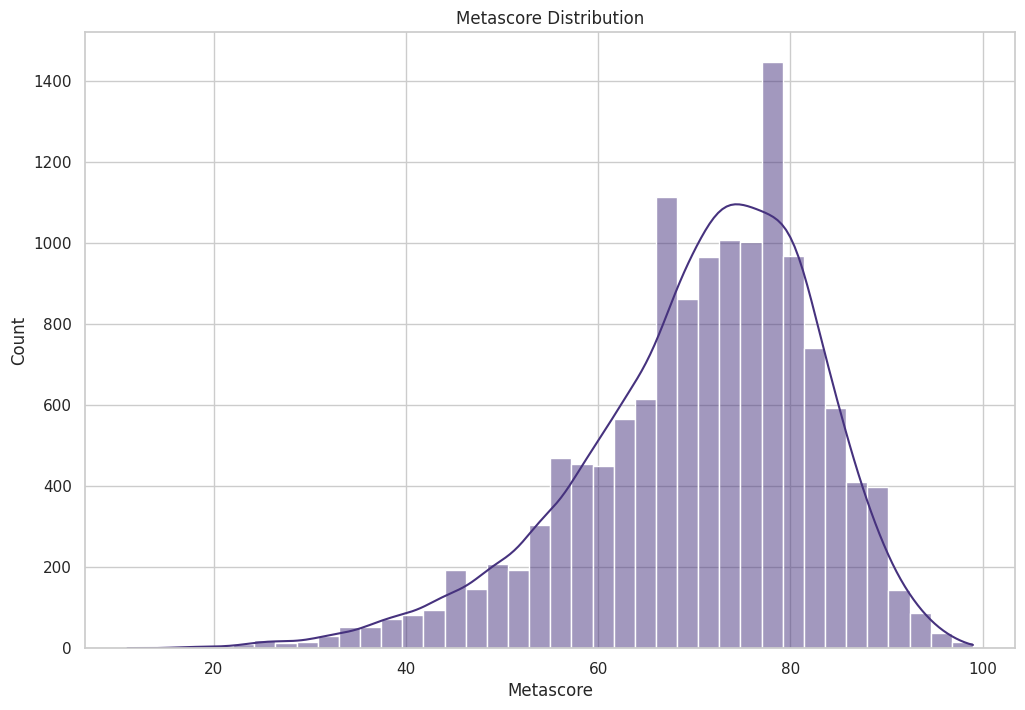

In [5]:
display(df[["Metascore", "Year"]].describe().T)
plt.figure(figsize=(12, 8))
sns.histplot(df["Metascore"], bins=40, kde=True)
plt.title("Metascore Distribution")
plt.show()

## 🏆 5. Inspect the Top-10 Highest-Scoring Games  
Sort the DataFrame by `Metascore` in descending order and display the ten best-rated titles with key metadata.

In [6]:
top10 = df.sort_values("Metascore", ascending=False).head(10)[
    ["Name", "Metascore", "Launch_date", "Rating"]
]
top10

,Name,Metascore,Launch_date,Rating
0,The Legend of Zelda: Ocarina of Time,99.0,1998-11-23,E
1,SoulCalibur,98.0,1999-09-08,T
2,Grand Theft Auto IV,98.0,2008-04-29,M
12,Super Mario Odyssey,97.0,2017-10-27,E10+
13,Halo: Combat Evolved,97.0,2001-11-15,M
11,Grand Theft Auto III,97.0,2001-10-22,M
3,Super Mario Galaxy,97.0,2007-11-12,E
4,Super Mario Galaxy 2,97.0,2010-05-23,E
8,Red Dead Redemption 2,97.0,2018-10-26,M
9,Grand Theft Auto V,97.0,2014-11-18,M


## 📊 6. Count of Games by ESRB Rating  
Visualize how many titles fall into each ESRB content-rating category.

/tmp/ipykernel_189994/1916623932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Set2")


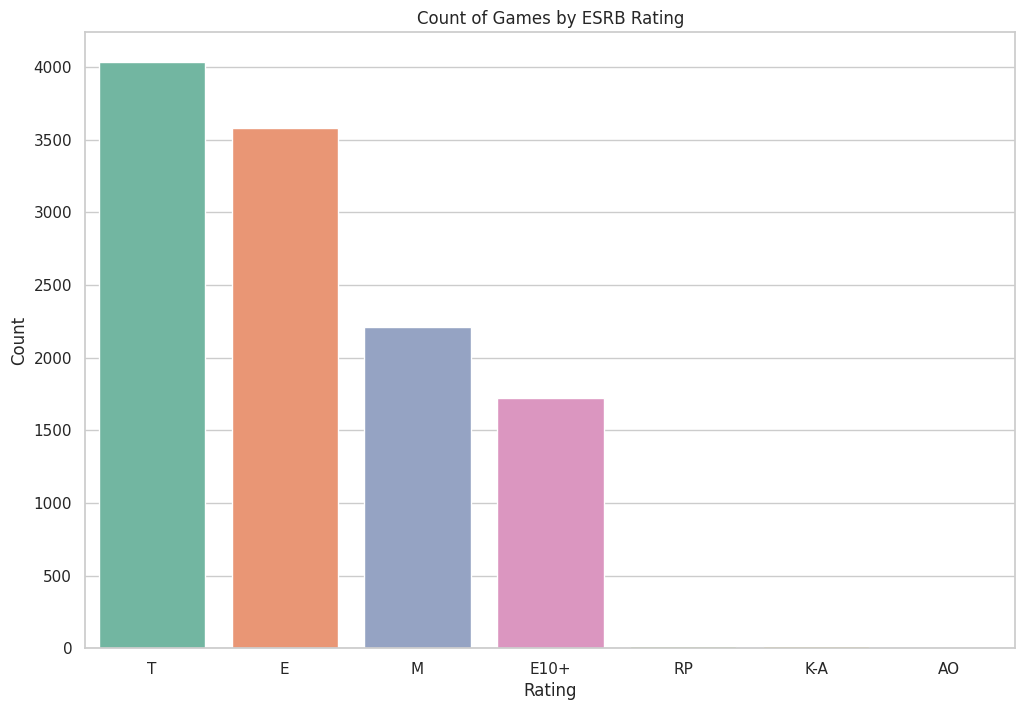

In [7]:
rating_counts = df["Rating"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Set2")
plt.title("Count of Games by ESRB Rating")
plt.ylabel("Count")
plt.show()

## 📈 7. Average Metascore & Number of Games per Year  
Track how both **average critic score** and **release volume** evolve over time.

/tmp/ipykernel_189994/2081455365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x="Year", y="count", ax=ax2, alpha=0.9,palette="viridis")


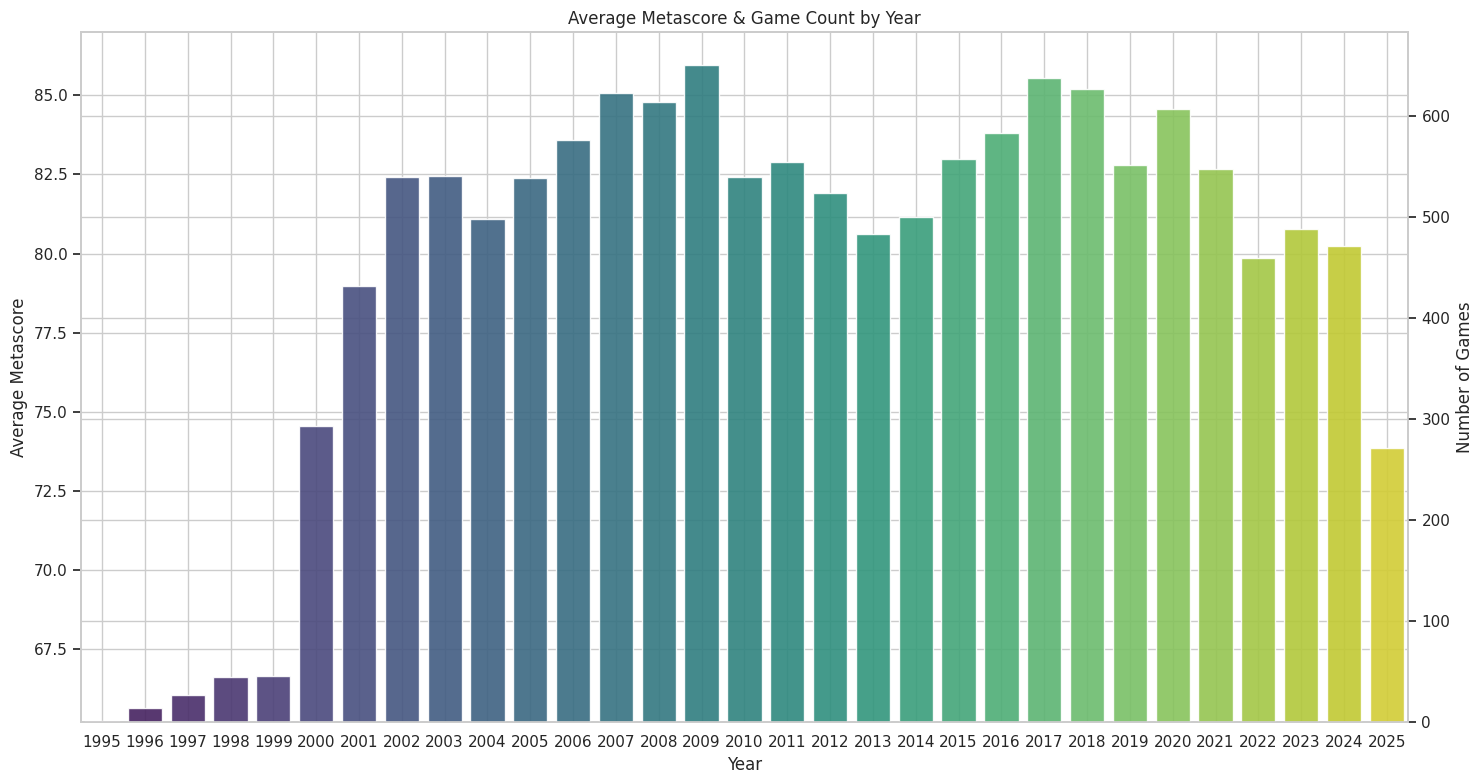

In [8]:
yearly = df.groupby("Year")["Metascore"].agg(["mean", "count"]).reset_index()
fig, ax1 = plt.subplots(figsize=(15,8))
sns.lineplot(data=yearly, x="Year", y="mean", ax=ax1, marker="o")
ax1.set_ylabel("Average Metascore")
ax2 = ax1.twinx()
sns.barplot(data=yearly, x="Year", y="count", ax=ax2, alpha=0.9,palette="viridis")
ax2.set_ylabel("Number of Games")
plt.title("Average Metascore & Game Count by Year")
fig.tight_layout()
plt.show()

## 🌥️ 8. Word Cloud of Recurring Themes in Game Descriptions  
Quickly surface the most common words (and implied themes) that appear in the `Details` text column.

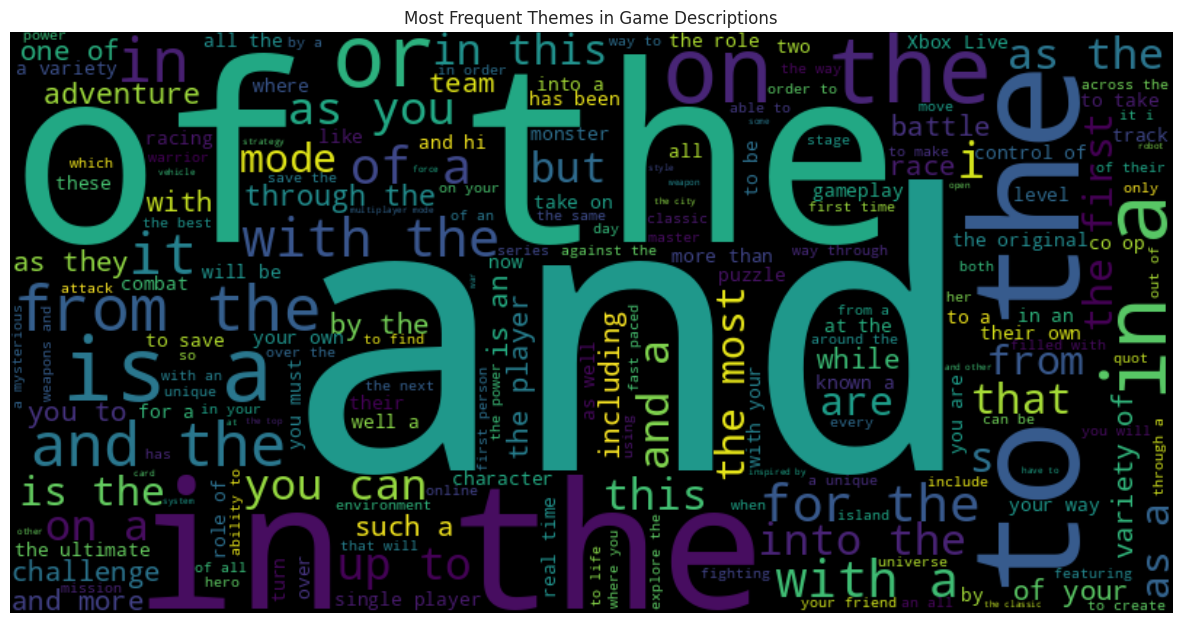

In [9]:
text = " ".join(df["Details"].dropna())
# Remove common stop-words & game jargon
stop = {"game", "new", "players", "play", "features", "world", "story", "set", "based", "experience"}
wc = WordCloud(width=800, height=400, background_color="black", stopwords=stop).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Themes in Game Descriptions")
plt.show()

## 📉 9. Metascore Distributions by Decade (Joyplot)  
Visualise how the **shape** and **spread** of critic scores have shifted across decades since 1990.

<Figure size 1200x800 with 0 Axes>

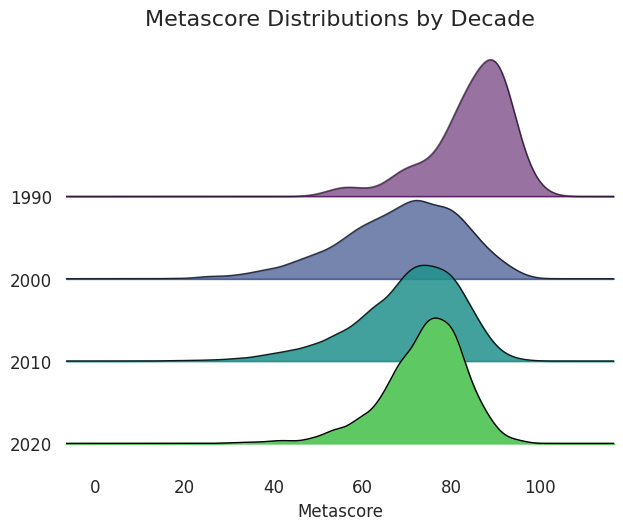

In [10]:
df["Decade"] = (df["Year"] // 10) * 10
plt.figure(figsize=(12,8))
joypy.joyplot(df[df["Decade"]>=1990], by="Decade", column="Metascore",
              colormap=plt.cm.viridis, fade=True, linewidth=1)
plt.title("Metascore Distributions by Decade", fontsize=16, pad=20)
plt.xlabel("Metascore")
plt.show()

## 📈 10. Best Game of Every Year  
Bubble plot that pinpoints the single highest-scoring release for each calendar year

In [11]:
top_per_year = (df.sort_values("Metascore", ascending=False)
                  .groupby("Year").head(1))  # best game each year

fig = px.scatter(top_per_year,
                 x="Year", y="Metascore", size="Metascore",
                 color="Metascore", hover_name="Name",
                 color_continuous_scale="plasma",
                 title="📈 Best Game Per Year (Bubble size = score)")
fig.update_layout(height=450)
fig.show()

## 🔥 11. Year-vs-Tier Heatmap  
Visualise how the **volume** of games in each Metascore tier has evolved year-over-year.

/tmp/ipykernel_189994/94375132.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



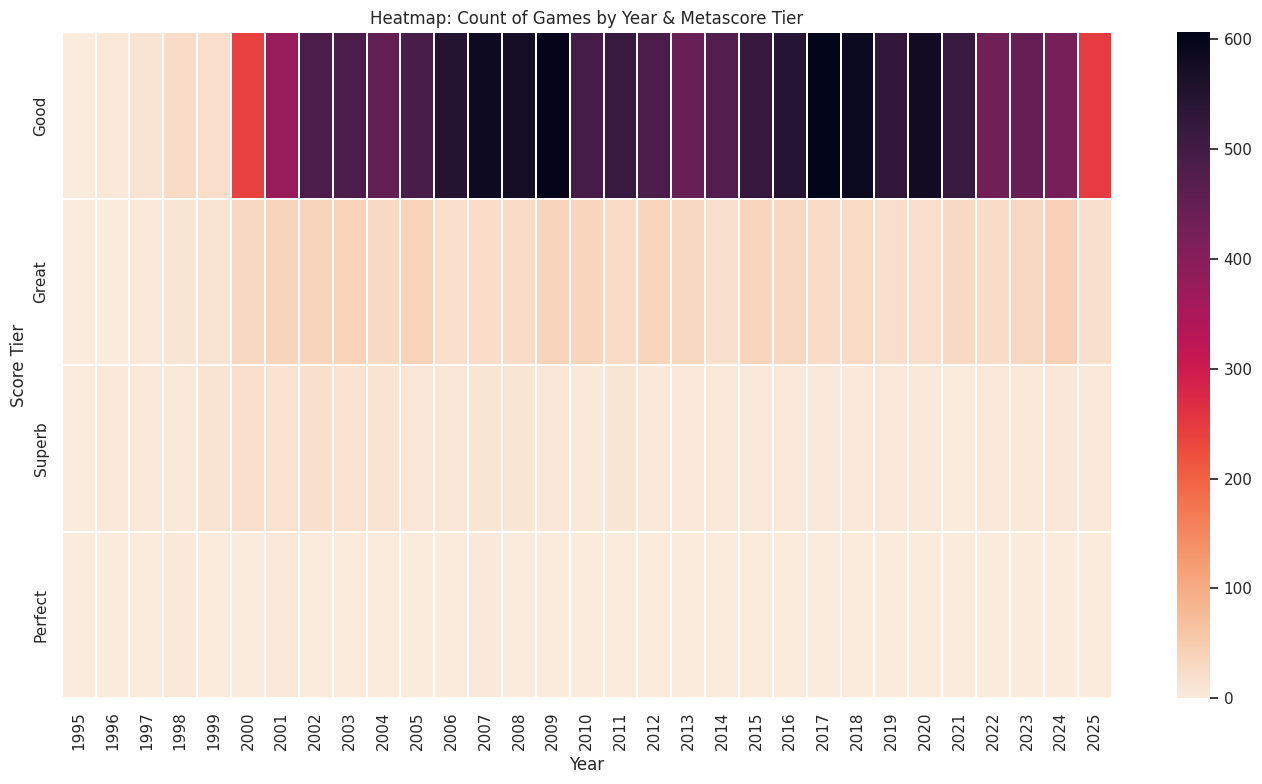

In [12]:
tier = pd.cut(df["Metascore"], bins=[0,85,90,95,100], labels=["Good","Great","Superb","Perfect"])
heat = df.groupby(["Year", tier]).size().unstack(fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(heat.T, cmap="rocket_r", linecolor="white", linewidth=.3)
plt.title("Heatmap: Count of Games by Year & Metascore Tier")
plt.ylabel("Score Tier"); plt.xlabel("Year")
plt.tight_layout(); plt.show()

## 🏆 12. Top-15 Highest-Rated Games – Horizontal Lollipop Chart  
A clean, publication-ready view of the absolute best-reviewed titles, ranked by Metascore.

/home/ayyan/jupyter_venv/jupyter_venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.



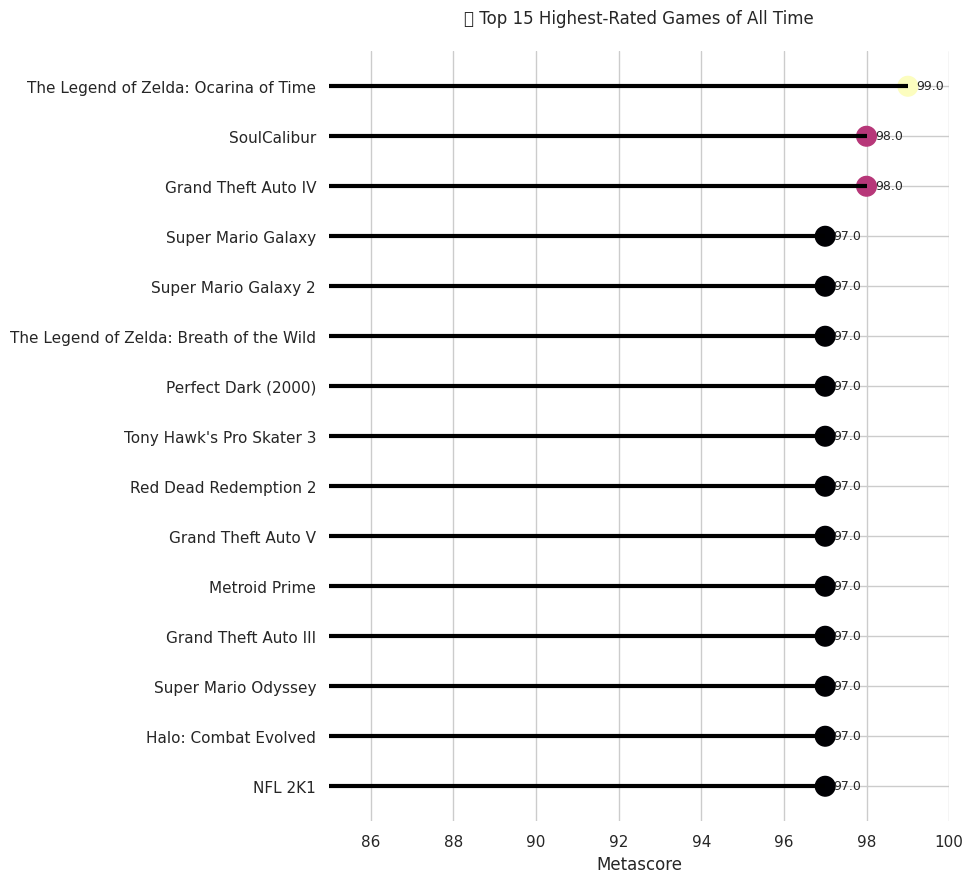

In [13]:
top15 = df.nlargest(15, "Metascore")[::-1]  # reverse for horizontal
plt.figure(figsize=(8,10))
plt.hlines(y=top15["Name"], xmin=85, xmax=top15["Metascore"], color="black", linewidth=3)
plt.scatter(top15["Metascore"], top15["Name"], s=200, c=top15["Metascore"], cmap="magma")
for _,row in top15.iterrows():
    plt.text(row["Metascore"]+.2, row["Name"], row["Metascore"], va="center", fontsize=9)
plt.xlim(85, 100)
plt.title("🏆 Top 15 Highest-Rated Games of All Time", pad=20)
plt.xlabel("Metascore")
sns.despine(left=True, bottom=True)
plt.show()

In [14]:
df.to_csv("Best_Games_Cleaned.csv", index=False)
print("Cleaned dataset saved → Best_Games_Cleaned.csv")

Cleaned dataset saved → Best_Games_Cleaned.csv
